In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
import os
import glob
import natsort
# !pip install monai
import os
import glob
import natsort
import matplotlib.pyplot as plt
from PIL import Image
import json
import numpy as np
import cv2
import shutil
import yaml


In [3]:
import os
from collections import defaultdict

# Define source directories
dir_dict = {
    'folder_1_images': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs',
    'folder_1_labels': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/annotations',
    'folder_2_images': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_2/OPGs',
    'folder_2_labels': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_2/annotations',
    'folder_3_images': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_3/OPGs',
    'folder_3_labels': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_3/annotations'
}

# Store filenames and their original paths
image_filenames = defaultdict(list)
label_filenames = defaultdict(list)

# Loop through each source folder
for key in ['folder_1', 'folder_2', 'folder_3']:
    image_folder = dir_dict[f'{key}_images']
    label_folder = dir_dict[f'{key}_labels']

    # Collect image filenames
    for image in os.listdir(image_folder):
        image_filenames[image].append(os.path.join(image_folder, image))

    # Collect label filenames
    for label in os.listdir(label_folder):
        label_filenames[label].append(os.path.join(label_folder, label))

# Identify duplicates
duplicate_images = {name: paths for name, paths in image_filenames.items() if len(paths) > 1}
duplicate_labels = {name: paths for name, paths in label_filenames.items() if len(paths) > 1}

# Print out duplicates
print("Duplicate Images:")
for name, paths in duplicate_images.items():
    print(f"{name}: Found in {paths}")

print("\nDuplicate Labels:")
for name, paths in duplicate_labels.items():
    print(f"{name}: Found in {paths}")



Duplicate Images:
52.png: Found in ['/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs/52.png', '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_2/OPGs/52.png']
64.png: Found in ['/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs/64.png', '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_2/OPGs/64.png']
25.png: Found in ['/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs/25.png', '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_2/OPGs/25.png']
55.png: Found in ['/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs/55.png', '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_2/OPGs/55.png']
93.png: Found in ['/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs/93.png', '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_2/OPGs/93.png']
81.png: Foun

Since most of our images from folder 2 are repeated in folder 1 and 3 we removed folder 2 from our adataset and were left with two overlapping images 67 and 84 in folder 1 and 3. we renamed them to 68 an d86 in folder 3 and rechecked and there were no overlapping json/image files. Now we can proceed to copy them to the destination directory where thye will be converted from json to txt yolo format and then seperated into train,val,test. We will have around 155 images from folder 1 and 3.

In [ ]:
len(duplicate_images)



18

In [ ]:
len(duplicate_labels)

22

In [4]:
import os
from collections import defaultdict

# Define source directories
dir_dict = {
    'folder_1_images': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs',
    'folder_1_labels': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/annotations',
    'folder_3_images': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_3/OPGs',
    'folder_3_labels': '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_3/annotations'
}

# Store filenames and their original paths
image_filenames = defaultdict(list)
label_filenames = defaultdict(list)

# Loop through each source folder
for key in ['folder_1', 'folder_3']:
    image_folder = dir_dict[f'{key}_images']
    label_folder = dir_dict[f'{key}_labels']

    # Collect image filenames
    for image in os.listdir(image_folder):
        image_filenames[image].append(os.path.join(image_folder, image))

    # Collect label filenames
    for label in os.listdir(label_folder):
        label_filenames[label].append(os.path.join(label_folder, label))

# Identify duplicates
duplicate_images = {name: paths for name, paths in image_filenames.items() if len(paths) > 1}
duplicate_labels = {name: paths for name, paths in label_filenames.items() if len(paths) > 1}

# Print out duplicates
print("Duplicate Images:")
print(len(duplicate_images))
for name, paths in duplicate_images.items():
    print(f"{name}: Found in {paths}")

print("\nDuplicate Labels:")
print(len(duplicate_labels))
for name, paths in duplicate_labels.items():
    print(f"{name}: Found in {paths}")



Duplicate Images:
0

Duplicate Labels:
0


In [ ]:
len(os.listdir('/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs'))

35

In [ ]:
len(os.listdir('/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_3/OPGs'))

120

In [5]:
import os
import shutil
import hashlib

# Define source directories for folder 1 and folder 3
folder_1_images = '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/OPGs'
folder_1_labels = '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_1/annotations'
folder_3_images = '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_3/OPGs'
folder_3_labels = '/content/drive/MyDrive/projectx/Niihhaa-Dataset-4ac91db/dataset/folder_3/annotations'

# Define destination directories
images_dir = '/content/drive/MyDrive/projectx/Images'
labels_dir = '/content/drive/MyDrive/projectx/Labels'

# Function to clear the destination folder before copying files
def clear_destination_folder(dest_folder):
    if os.path.exists(dest_folder):
        for file in os.listdir(dest_folder):
            file_path = os.path.join(dest_folder, file)
            if os.path.isfile(file_path):
                os.remove(file_path)

# Create destination directories if they don't exist
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# Clear the destination folders to avoid mixing with old files
clear_destination_folder(images_dir)
clear_destination_folder(labels_dir)

# Allowed image extensions (normalize to lowercase)
valid_extensions = {'.png', '.jpg', '.PNG', '.JPG', '.JPEG', '.jpeg'}

# Function to get file hash (used to check for duplicate images)
def get_file_hash(file_path):
    hash_sha256 = hashlib.sha256()
    with open(file_path, 'rb') as f:
        while chunk := f.read(4096):
            hash_sha256.update(chunk)
    return hash_sha256.hexdigest()

# Function to copy files from source to destination, avoiding duplicates
def copy_files(src_folder, dest_folder, valid_exts=None):
    seen_hashes = set()  # Set to track hashes of copied files
    for file in os.listdir(src_folder):
        if file.startswith('.'):  # Skip hidden files
            continue

        # Normalize extension to lowercase
        _, ext = os.path.splitext(file)
        ext = ext.lower()

        if valid_exts is None or ext in valid_exts:  # Filter by valid extension
            src_path = os.path.join(src_folder, file)
            dest_path = os.path.join(dest_folder, file)

            # Check if it's a file and if it already exists in the destination folder
            if os.path.isfile(src_path):
                # Check if the file already exists based on hash
                file_hash = get_file_hash(src_path)
                if file_hash not in seen_hashes and not os.path.exists(dest_path):
                    shutil.copy(src_path, dest_path)
                    seen_hashes.add(file_hash)

# Function to check for common files in both folders (folder_1 and folder_3)
def check_for_common_files():
    folder_1_files = set(os.listdir(folder_1_images))
    folder_3_files = set(os.listdir(folder_3_images))

    # Find intersection (files that exist in both folders)
    common_files = folder_1_files & folder_3_files
    print(f"Common Files: {common_files}")

# Check for common files between folder_1 and folder_3
check_for_common_files()

# Copy images from folder 1 and folder 3 to the destination folder (without duplicates)
copy_files(folder_1_images, images_dir, valid_extensions)
copy_files(folder_3_images, images_dir, valid_extensions)

# Copy labels from folder 1 and folder 3 to the destination folder (without duplicates)
copy_files(folder_1_labels, labels_dir)
copy_files(folder_3_labels, labels_dir)

# Print final counts after copying
print(f"Total Images Copied: {len(os.listdir(images_dir))}")
print(f"Total Labels Copied: {len(os.listdir(labels_dir))}")


Common Files: set()
Total Images Copied: 154
Total Labels Copied: 154


In [ ]:
len(os.listdir('/content/drive/MyDrive/projectx/Images'))

154

In [ ]:
len(os.listdir('/content/drive/MyDrive/projectx/Labels'))

154

In [6]:
!pip install ultralytics opencv-python-headless
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [7]:
import os
import json
import cv2
import numpy as np

# Paths
image_dir = "/content/drive/MyDrive/projectx/Images"
annotation_dir = "/content/drive/MyDrive/projectx/Labels"

# Get all image and annotation files (sorted correctly)
image_files = sorted(os.listdir(image_dir))  # Ensures correct order
annotation_files = sorted(os.listdir(annotation_dir))  # Ensures correct order

# Create a filename mapping
image_map = {os.path.splitext(f)[0]: f for f in image_files}

# Class mapping
CLASS_NAMES = ['central incisor', 'lateral incisor', 'canine', 'premolar', 'molar']
CLASS_MAP = {name: idx for idx, name in enumerate(CLASS_NAMES)}

# Process each annotation file
for json_file in annotation_files:
    if not json_file.endswith(".json"):
        continue  # Skip non-JSON files

    filename = os.path.splitext(json_file)[0]  # Get filename without extension

    # Match the correct image
    if filename not in image_map:
        print(f"⚠️ Warning: No matching image found for {json_file}. Skipping...")
        continue

    image_path = os.path.join(image_dir, image_map[filename])

    # Load image
    image = cv2.imread(image_path)
    if image is None:
        print(f"⚠️ Warning: Could not read {image_path}. Skipping...")
        continue

    h, w, _ = image.shape  # Get dimensions

    # Load annotation
    json_filepath = os.path.join(annotation_dir, json_file)
    with open(json_filepath, "r") as f:
        annotation = json.load(f)

    # Prepare YOLO annotation file (overwrite JSON with .txt)
    txt_filepath = os.path.join(annotation_dir, f"{filename}.txt")

    with open(txt_filepath, "w") as yolo_file:
        for shape in annotation["shapes"]:
            label = shape["label"]
            if label not in CLASS_MAP:
                print(f"⚠️ Warning: Unknown class '{label}' in {json_file}. Skipping...")
                continue

            class_id = CLASS_MAP[label]
            points = np.array(shape["points"], dtype=np.float32)

            # Normalize polygon coordinates
            norm_points = [(x / w, y / h) for x, y in points]
            norm_points_flat = [str(coord) for point in norm_points for coord in point]

            # Write to YOLO format
            yolo_file.write(f"{class_id} " + " ".join(norm_points_flat) + "\n")

    # Remove JSON file after conversion
    os.remove(json_filepath)
    print(f"✅ Converted and replaced: {json_file} -> {txt_filepath}")

print("✅ All annotations converted successfully!")


✅ Converted and replaced: 10.json -> /content/drive/MyDrive/projectx/Labels/10.txt
✅ Converted and replaced: 1004.json -> /content/drive/MyDrive/projectx/Labels/1004.txt
✅ Converted and replaced: 1010.json -> /content/drive/MyDrive/projectx/Labels/1010.txt
✅ Converted and replaced: 1011.json -> /content/drive/MyDrive/projectx/Labels/1011.txt
✅ Converted and replaced: 1015.json -> /content/drive/MyDrive/projectx/Labels/1015.txt
✅ Converted and replaced: 1016.json -> /content/drive/MyDrive/projectx/Labels/1016.txt
✅ Converted and replaced: 1018.json -> /content/drive/MyDrive/projectx/Labels/1018.txt
✅ Converted and replaced: 102.json -> /content/drive/MyDrive/projectx/Labels/102.txt
✅ Converted and replaced: 1031.json -> /content/drive/MyDrive/projectx/Labels/1031.txt
✅ Converted and replaced: 1032.json -> /content/drive/MyDrive/projectx/Labels/1032.txt
✅ Converted and replaced: 1034.json -> /content/drive/MyDrive/projectx/Labels/1034.txt
✅ Converted and replaced: 1036.json -> /content/d

In [8]:
import os
import shutil
import random

# Paths
base_dir = "/content/drive/MyDrive/projectx"
images_dir = os.path.join(base_dir, "Images")
labels_dir = os.path.join(base_dir, "Labels")

# Define target directories
train_images_dir = os.path.join(base_dir, "train/images")
train_labels_dir = os.path.join(base_dir, "train/labels")
val_images_dir = os.path.join(base_dir, "val/images")
val_labels_dir = os.path.join(base_dir, "val/labels")
test_images_dir = os.path.join(base_dir, "test/images")
test_labels_dir = os.path.join(base_dir, "test/labels")

# Create directories if they don't exist
for dir_path in [train_images_dir, train_labels_dir, val_images_dir, val_labels_dir, test_images_dir, test_labels_dir]:
    os.makedirs(dir_path, exist_ok=True)

# List of image files with valid extensions
image_files = [f for f in os.listdir(images_dir) if f.lower().endswith((".png", ".jpg", ".jpeg"))]

# Shuffle the list of image files
random.shuffle(image_files)

# Calculate split sizes
total_files = len(image_files)
train_size = int(0.7 * total_files)
val_size = int(0.15 * total_files)
test_size = total_files - train_size - val_size

# Split the files into train, val, and test sets
train_images = image_files[:train_size]
val_images = image_files[train_size:train_size + val_size]
test_images = image_files[train_size + val_size:]

def move_files(image_list, src_img_dir, dest_img_dir, src_lbl_dir, dest_lbl_dir):
    for image in image_list:
        src_img_path = os.path.join(src_img_dir, image)
        dest_img_path = os.path.join(dest_img_dir, image)

        label_name = image.rsplit('.', 1)[0] + '.txt'
        src_lbl_path = os.path.join(src_lbl_dir, label_name)
        dest_lbl_path = os.path.join(dest_lbl_dir, label_name)

        # Move image file
        if os.path.exists(src_img_path):
            shutil.move(src_img_path, dest_img_path)
        else:
            print(f"Warning: File {image} not found in {src_img_dir}")

        # Move corresponding label file
        if os.path.exists(src_lbl_path):
            shutil.move(src_lbl_path, dest_lbl_path)
        else:
            print(f"Warning: Label {label_name} not found in {src_lbl_dir}")

# Move files to their respective directories
move_files(train_images, images_dir, train_images_dir, labels_dir, train_labels_dir)
move_files(val_images, images_dir, val_images_dir, labels_dir, val_labels_dir)
move_files(test_images, images_dir, test_images_dir, labels_dir, test_labels_dir)

# Print the final counts of files in the destination directories
print(f"Total Train Images: {len(os.listdir(train_images_dir))}")
print(f"Total Val Images: {len(os.listdir(val_images_dir))}")
print(f"Total Test Images: {len(os.listdir(test_images_dir))}")
print(f"Total Train Labels: {len(os.listdir(train_labels_dir))}")
print(f"Total Val Labels: {len(os.listdir(val_labels_dir))}")
print(f"Total Test Labels: {len(os.listdir(test_labels_dir))}")

print("✅ Dataset successfully split and organized!")


Total Train Images: 107
Total Val Images: 23
Total Test Images: 24
Total Train Labels: 107
Total Val Labels: 23
Total Test Labels: 24
✅ Dataset successfully split and organized!


In [9]:
import yaml

yaml_data = {
    'train': '/content/drive/MyDrive/projectx/train',
    'val': '/content/drive/MyDrive/projectx/val',
    'test': '/content/drive/MyDrive/projectx/test',
    'nc': 5,  # Number of classes
    'names': ['central incisor', 'lateral incisor', 'canine', 'premolar', 'molar']

}

yaml_file_path = '/content/drive/MyDrive/projectx/yolov8.yaml'
# Write the data to the YAML file
with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(yaml_data, yaml_file, default_flow_style=False)

print(f"YAML file saved at: {yaml_file_path}")

YAML file saved at: /content/drive/MyDrive/projectx/yolov8.yaml


In [10]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data=yaml_file_path, imgsz=640, batch=16, save=True, name='val_results')


100%|██████████| 6.25M/6.25M [00:00<00:00, 79.2MB/s]


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/projectx/yolov8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=val_results, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sh

100%|██████████| 755k/755k [00:00<00:00, 14.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.2MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/projectx/train/labels... 107 images, 2 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:01<00:00, 75.51it/s]


train: New cache created: /content/drive/MyDrive/projectx/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/projectx/val/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 29.10it/s]


val: New cache created: /content/drive/MyDrive/projectx/val/labels.cache
Plotting labels to runs/detect/val_results/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/val_results
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.86G      2.318      4.412      1.729        459        640: 100%|██████████| 7/7 [00:08<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.12s/it]

                   all         23        567          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.88G      1.836      4.129      1.368        600        640: 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         23        567          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.69G      1.499      3.157      1.132        627        640: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         23        567     0.0112      0.139     0.0435     0.0243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.95G      1.507      2.428      1.079        577        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         23        567     0.0504      0.683      0.168     0.0807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.61G      1.353      2.001       1.06        497        640: 100%|██████████| 7/7 [00:06<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         23        567     0.0616      0.762      0.191     0.0974



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.88G      1.361      1.781      1.042        544        640: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         23        567      0.071      0.829      0.284      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.78G      1.275       1.58      1.024        588        640: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]

                   all         23        567       0.43      0.293      0.313      0.186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.01G      1.227      1.456      1.017        533        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         23        567      0.477      0.408      0.429      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.73G      1.222      1.399      1.014        548        640: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         23        567      0.539      0.489      0.526      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.75G      1.194       1.32      1.012        566        640: 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         23        567      0.565      0.573      0.575      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.82G      1.193      1.255      1.003        520        640: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         23        567      0.554      0.518      0.548      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.58G      1.144      1.163      0.994        451        640: 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        567      0.574      0.727      0.623      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.62G      1.141      1.188     0.9996        367        640: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         23        567      0.495      0.682      0.544       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.88G      1.134      1.155      1.007        590        640: 100%|██████████| 7/7 [00:07<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23        567      0.579       0.75      0.664      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100       2.9G       1.11      1.112      0.991        547        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         23        567      0.454      0.693       0.54       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.88G      1.135      1.127      0.983        441        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         23        567      0.564      0.783       0.69      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.71G      1.096      1.087     0.9947        529        640: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         23        567      0.548      0.807       0.69      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.61G      1.098      1.076     0.9812        472        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         23        567       0.57      0.791      0.667      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.64G      1.093      1.045     0.9918        457        640: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         23        567      0.631       0.81      0.737      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.91G      1.076       1.03     0.9806        575        640: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         23        567      0.679      0.802      0.793      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.85G      1.047      1.023     0.9899        606        640: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         23        567      0.697      0.844      0.829       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.84G      1.059     0.9911      0.981        419        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        567      0.686       0.82      0.824      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.85G      1.071     0.9922     0.9727        476        640: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         23        567      0.766      0.816      0.866      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.01G      1.018     0.9445     0.9687        481        640: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         23        567      0.775      0.814      0.863      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.63G      1.015     0.9295     0.9651        630        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         23        567      0.775      0.833      0.881      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100       2.6G      1.073     0.9296     0.9701        664        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         23        567      0.849      0.842      0.921      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       3.1G      1.021     0.9171     0.9576        630        640: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         23        567      0.742      0.827      0.879      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.72G      1.011     0.8956     0.9652        467        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         23        567      0.812      0.856      0.924      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.85G      1.006     0.8936     0.9708        510        640: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23        567      0.874      0.864      0.944      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.84G     0.9878     0.8834      0.957        547        640: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         23        567      0.764      0.805      0.866      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.91G      1.047     0.9125     0.9592        673        640: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         23        567      0.871      0.833      0.934      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       2.9G     0.9997      0.854     0.9546        643        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         23        567       0.83      0.855      0.914      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.65G      1.021     0.8579     0.9469        780        640: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         23        567      0.875      0.864      0.941      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.95G      1.015     0.8491     0.9504        471        640: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         23        567      0.932      0.922      0.972      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.82G      1.001     0.8491     0.9565        755        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         23        567      0.911      0.909      0.965      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.81G     0.9482     0.8302     0.9479        526        640: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         23        567      0.942        0.9      0.971      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.55G     0.9619     0.8119     0.9522        606        640: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         23        567      0.869      0.864      0.947      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.05G     0.9283     0.7832     0.9374        579        640: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         23        567      0.925      0.918      0.972      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.18G     0.9549     0.7727      0.939        570        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         23        567      0.927      0.927      0.975      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.66G     0.9935      0.802     0.9535        542        640: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        567      0.915      0.953      0.976      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.62G     0.9442     0.7687     0.9458        438        640: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23        567      0.923      0.932      0.972      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.71G     0.9631     0.7798     0.9302        744        640: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         23        567      0.889      0.948      0.976      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.95G     0.9621     0.7826     0.9437        485        640: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         23        567      0.965      0.921      0.983      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.95G     0.9192     0.7437     0.9477        382        640: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         23        567      0.952      0.914       0.98      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.58G     0.9155     0.7358     0.9273        644        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         23        567      0.959       0.92      0.979      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.7G     0.9294     0.7298     0.9399        525        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

                   all         23        567      0.966      0.923      0.982      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.83G      0.934     0.7358      0.934        500        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         23        567      0.928      0.899      0.975      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.94G     0.8865       0.71     0.9392        486        640: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         23        567      0.942      0.956      0.982      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.64G     0.8875      0.688     0.9327        560        640: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         23        567      0.948      0.952      0.982      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.73G     0.8847     0.6906     0.9333        469        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         23        567      0.951      0.941      0.986      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.69G     0.8763     0.7042     0.9382        271        640: 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         23        567      0.939      0.947      0.987      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.94G     0.9237     0.7044     0.9194        519        640: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         23        567      0.949      0.948      0.986      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.83G     0.9014     0.7249     0.9427        565        640: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         23        567      0.927      0.939      0.983      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.75G     0.8871     0.6851     0.9324        518        640: 100%|██████████| 7/7 [00:03<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         23        567       0.92      0.907       0.97      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.33G      0.898     0.6832     0.9259        639        640: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.43it/s]

                   all         23        567      0.929      0.923      0.976      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.74G     0.8719     0.6675      0.927        551        640: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         23        567      0.962      0.932      0.983      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.75G     0.8773     0.6646     0.9267        496        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all         23        567      0.941      0.949      0.986      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.59G     0.8765     0.6524     0.9223        543        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         23        567      0.954      0.929      0.979      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.88G     0.8581     0.6636     0.9334        346        640: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         23        567       0.96      0.932      0.983      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.75G     0.8839     0.6743     0.9387        766        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         23        567      0.924      0.926      0.978      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.63G     0.9028     0.6742     0.9156        510        640: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         23        567      0.961       0.93      0.985      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.71G     0.8602     0.6439     0.9293        321        640: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         23        567      0.955      0.969      0.988       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.96G     0.8455     0.6364     0.9229        494        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         23        567      0.952      0.967      0.989      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.12G     0.9067     0.6524     0.9216        539        640: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all         23        567      0.926      0.965      0.987      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.68G     0.8991     0.6493     0.9274        636        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23        567      0.927      0.975      0.987      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.79G     0.8841     0.6503     0.9147        377        640: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         23        567      0.965      0.953      0.987      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.98G     0.8924     0.6341     0.9197        561        640: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]

                   all         23        567       0.96      0.967      0.985      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.62G      0.874     0.6127     0.9221        540        640: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         23        567      0.966      0.958      0.985      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.19G     0.8406     0.6136     0.9221        514        640: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         23        567      0.968      0.954      0.985      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.87G     0.8803     0.6257     0.9167        498        640: 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         23        567      0.976       0.95      0.986      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.83G     0.8492     0.6184     0.9177        529        640: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         23        567      0.964      0.959      0.986      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.76G     0.8391     0.6108     0.9151        536        640: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         23        567      0.964      0.954      0.987      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.66G     0.8553     0.6133      0.915        598        640: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         23        567      0.962      0.962      0.989      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.76G     0.8605     0.6101     0.9176        471        640: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         23        567      0.969       0.97      0.989      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.09G     0.8633     0.6149     0.9219        721        640: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         23        567      0.959      0.972      0.987      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.06G     0.8558     0.6027     0.9136        658        640: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         23        567      0.953      0.965      0.988      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.62G     0.8278     0.6116     0.9115        331        640: 100%|██████████| 7/7 [00:03<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         23        567      0.951      0.961      0.988      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.19G     0.8467     0.6028     0.9078        641        640: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]

                   all         23        567      0.969      0.971       0.99       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.68G     0.8277        0.6     0.9172        545        640: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         23        567      0.969      0.957      0.989      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.16G     0.8738      0.614     0.9076        578        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         23        567      0.969      0.965       0.99      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.83G     0.8466     0.6003     0.9068        507        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         23        567      0.967       0.97       0.99      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.85G      0.853     0.5995     0.9174        462        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        567      0.965       0.98      0.989      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.72G     0.8319     0.5839     0.9073        560        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         23        567      0.967      0.974      0.989       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.06G     0.8847     0.6076     0.9136        583        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         23        567      0.962      0.973      0.989      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.77G     0.8311     0.5879     0.9012        614        640: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         23        567      0.959      0.979      0.989      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.18G     0.8515     0.5925     0.9113        593        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         23        567      0.976      0.963      0.988      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.79G     0.8284     0.5914     0.9116        401        640: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         23        567      0.969      0.966      0.988      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.75G     0.8393     0.5814     0.9066        510        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         23        567      0.973      0.961      0.989      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.91G     0.8097     0.5763     0.9071        515        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         23        567       0.96      0.975       0.99      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.58G     0.8187     0.5777     0.9004        551        640: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         23        567      0.971      0.975      0.991       0.74


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.2G     0.8259     0.6803     0.9317        267        640: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all         23        567      0.974      0.974      0.991      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100       2.2G     0.8069     0.6249      0.918        274        640: 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         23        567      0.967      0.974      0.991      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100       2.3G     0.7827     0.5984     0.9234        308        640: 100%|██████████| 7/7 [00:02<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]

                   all         23        567       0.97      0.973       0.99      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100       2.3G     0.7833     0.5997     0.9217        296        640: 100%|██████████| 7/7 [00:01<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         23        567      0.969      0.967       0.99      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       2.3G     0.7858     0.5895     0.9192        297        640: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         23        567      0.973      0.965      0.989      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100       2.2G     0.7899      0.574     0.9092        299        640: 100%|██████████| 7/7 [00:02<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        567      0.961       0.97      0.988       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       2.3G     0.8035     0.5744     0.9139        281        640: 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        567      0.962      0.971      0.988      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100       2.3G       0.76     0.5541     0.9026        300        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         23        567      0.967      0.969      0.989       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       2.3G     0.7693     0.5588     0.9015        276        640: 100%|██████████| 7/7 [00:02<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         23        567      0.974      0.968      0.989       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       2.2G     0.7748     0.5593     0.9151        256        640: 100%|██████████| 7/7 [00:02<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         23        567      0.971      0.971      0.989       0.73



100 epochs completed in 0.217 hours.
Optimizer stripped from runs/detect/val_results/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/val_results/weights/best.pt, 6.2MB

Validating runs/detect/val_results/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


                   all         23        567      0.965       0.98      0.989      0.741
       central incisor         23         83      0.964      0.982      0.984      0.704
       lateral incisor         23         86      0.972      0.977      0.989      0.719
                canine         23         83      0.922          1       0.99      0.718
              premolar         21        150      0.967      0.962      0.987      0.755
                 molar         21        165          1      0.981      0.995      0.811
Speed: 0.1ms preprocess, 1.7ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val_results


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797c24c1aa50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [13]:
# Load the trained model
model_path = "/content/runs/detect/val_results/weights/best.pt"  # Update this if needed
model = YOLO(model_path)

test_images_dir = "/content/drive/MyDrive/projectx/test/images"

# Run inference
# results = model(test_images_dir, save=True, project="/content/drive/MyDrive/projectx", name="test_results")

results = model.predict(test_images_dir, save=True, project="/content/drive/MyDrive/projectx", name="test_results", show=False, line_width=1, conf=0.1)




image 1/24 /content/drive/MyDrive/projectx/test/images/1004.JPG: 352x640 4 central incisors, 5 lateral incisors, 5 canines, 11 premolars, 8 molars, 42.3ms
image 2/24 /content/drive/MyDrive/projectx/test/images/1016.JPG: 352x640 6 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 11 molars, 7.1ms
image 3/24 /content/drive/MyDrive/projectx/test/images/179.JPG: 352x640 4 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 13 molars, 9.4ms
image 4/24 /content/drive/MyDrive/projectx/test/images/192.jpg: 384x640 4 central incisors, 4 lateral incisors, 4 canines, 9 premolars, 12 molars, 37.8ms
image 5/24 /content/drive/MyDrive/projectx/test/images/197.jpg: 384x640 5 central incisors, 4 lateral incisors, 5 canines, 9 premolars, 12 molars, 7.0ms
image 6/24 /content/drive/MyDrive/projectx/test/images/276.JPG: 352x640 6 central incisors, 6 lateral incisors, 4 canines, 7 premolars, 10 molars, 7.7ms
image 7/24 /content/drive/MyDrive/projectx/test/images/333.JPG: 352x640 5 cen

In [14]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/drive/MyDrive/projectx/test_results/1004.jpg')

# Iterate over the predictions
for result in results[0].boxes.data:
    x1, y1, x2, y2, score, class_id = result[:6].cpu().numpy()
    class_name = model.names[int(class_id)]
    confidence = f"{score:.2f}"

    # Draw thin bounding box
    color = (255, 255, 255)  # White color for box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 1)

    # Calculate label position (above the box)
    label_x, label_y = int(x1), int(y1) - 10
    if label_y < 10:
        label_y = int(y2) + 20  # If above is outside image, place below


from google.colab.patches import cv2_imshow

# Display the image in Colab
cv2_imshow(image)


In [20]:
metrics = model.val(data=yaml_file_path, split="test")
print(metrics)

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/projectx/test/labels... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<00:00, 112.55it/s]

val: New cache created: /content/drive/MyDrive/projectx/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]


                   all         24        679      0.968       0.97      0.989      0.771
       central incisor         23         90      0.977      0.957      0.987      0.733
       lateral incisor         23         89      0.966      0.989      0.992      0.744
                canine         24         92      0.927      0.946      0.982      0.764
              premolar         24        181      0.976      0.972      0.991      0.779
                 molar         23        227      0.993      0.987      0.995      0.836
Speed: 7.9ms preprocess, 18.4ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/val6
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797c283b7550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_result

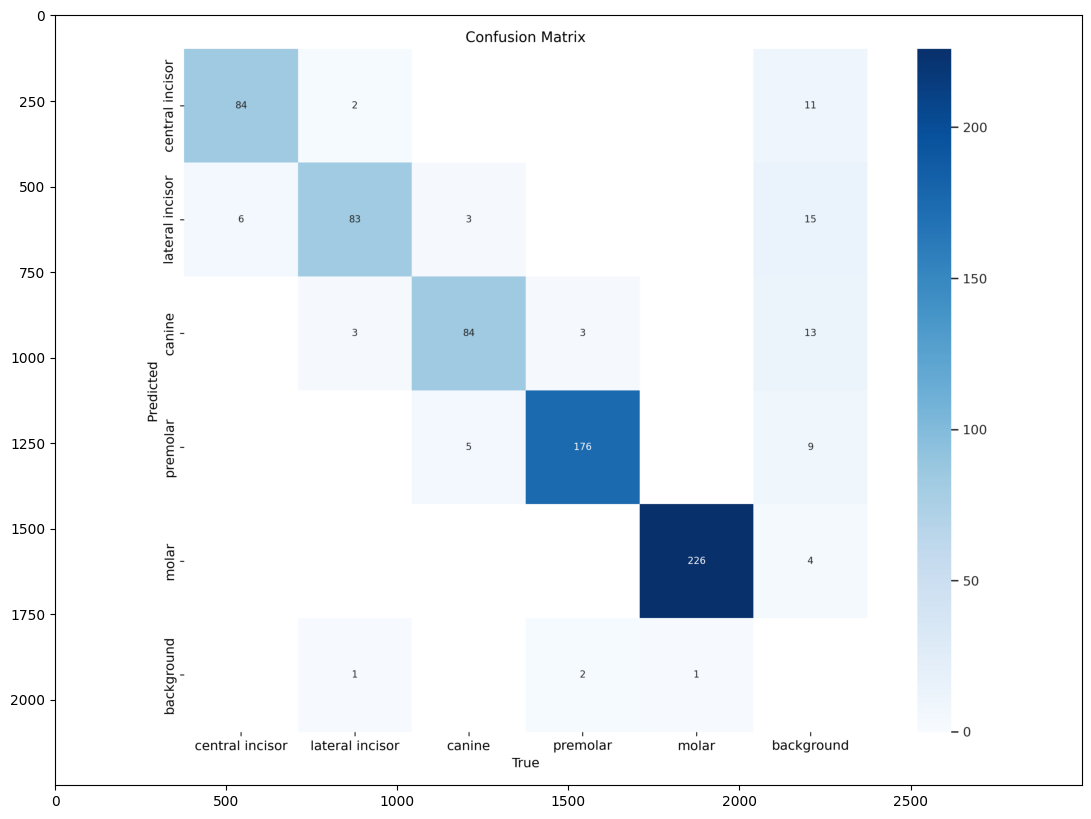

In [37]:
image = Image.open('/content/runs/detect/val6/confusion_matrix.png')
plt.figure(figsize = (20,10))

plt.imshow(image)
plt.show()


In [25]:
model = YOLO('yolov8m.pt')
model.train(data=yaml_file_path, imgsz=640, batch=16, save=True, name='val_results_m')

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/projectx/yolov8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=val_results_m2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

train: Scanning /content/drive/MyDrive/projectx/train/labels.cache... 107 images, 2 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/projectx/val/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/detect/val_results_m2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/val_results_m2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.59G      1.973      4.552      1.548        459        640: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

                   all         23        567    0.00243      0.016    0.00133   0.000861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.42G      1.474      2.802      1.218        600        640: 100%|██████████| 7/7 [00:04<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         23        567      0.362      0.573      0.465      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.78G      1.015      1.209      1.008        627        640: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         23        567      0.593      0.759      0.718      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.05G      1.003      1.008     0.9719        577        640: 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         23        567      0.615      0.769      0.698      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.46G     0.9801     0.8951      1.008        497        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         23        567      0.742      0.828      0.849      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.75G      0.955     0.8037     0.9941        544        640: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         23        567      0.753      0.821      0.828      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.41G     0.9147     0.6942     0.9729        588        640: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.07it/s]

                   all         23        567      0.852      0.842      0.934      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.06G     0.8772     0.6527     0.9696        533        640: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         23        567      0.741      0.876      0.866      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.63G     0.8625      0.635     0.9632        548        640: 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         23        567      0.831      0.853      0.912      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.41G     0.8902     0.6257     0.9793        566        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         23        567      0.892      0.906      0.954      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.67G     0.8864     0.5899     0.9581        520        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         23        567      0.833      0.849      0.928      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.54G     0.8573     0.5594     0.9625        451        640: 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         23        567      0.918      0.925       0.96      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.61G     0.8609     0.5548     0.9627        367        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         23        567       0.91      0.867      0.947      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.73G      0.876     0.5659     0.9779        590        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         23        567      0.957      0.934      0.981      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.63G      0.853     0.5375     0.9499        547        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]

                   all         23        567       0.92      0.885      0.954      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.72G     0.8847     0.5431     0.9485        441        640: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         23        567      0.934      0.946      0.978      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.81G     0.8953     0.5455     0.9741        529        640: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         23        567       0.94      0.951      0.983      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.57G     0.8398     0.5091     0.9448        472        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         23        567      0.951      0.942      0.984      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.49G     0.8757     0.5301      0.963        457        640: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         23        567      0.951      0.939      0.984       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.62G     0.8568     0.5053      0.944        575        640: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         23        567      0.966       0.96      0.984       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.95G     0.8286     0.4985     0.9501        606        640: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         23        567      0.976      0.959      0.987      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.47G     0.8229     0.4791     0.9402        419        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         23        567      0.978      0.964       0.99      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.62G     0.8364     0.4843     0.9295        476        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         23        567      0.969      0.977      0.991      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.44G     0.7648     0.4522     0.9225        481        640: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         23        567      0.974       0.96      0.984      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.74G      0.773      0.454     0.9167        630        640: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         23        567      0.967      0.966      0.983      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.51G     0.8144     0.4557     0.9219        664        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         23        567      0.952      0.959      0.984      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.85G     0.7753     0.4452     0.9079        630        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         23        567      0.967      0.961      0.989      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.66G     0.7561     0.4374     0.9131        467        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         23        567      0.972       0.96      0.989       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       7.6G     0.7519      0.445     0.9192        510        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         23        567      0.981      0.961       0.99      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.47G     0.7354     0.4252     0.9095        547        640: 100%|██████████| 7/7 [00:04<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]

                   all         23        567       0.97      0.974       0.99      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.86G      0.773      0.446     0.9066        673        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all         23        567      0.987      0.954      0.989      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.73G     0.7463     0.4308     0.9002        643        640: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         23        567      0.975      0.975       0.99      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.66G     0.7331     0.4246     0.8898        780        640: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.50it/s]

                   all         23        567      0.973      0.983      0.992      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.69G     0.7371     0.4159     0.8949        471        640: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         23        567       0.98      0.982      0.993      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.67G     0.7171     0.4168     0.8948        755        640: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        567      0.976      0.988      0.992      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.55G     0.6938     0.4025     0.8968        526        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         23        567      0.978      0.981       0.99      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.58G     0.7017      0.397     0.8921        606        640: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         23        567       0.98      0.969      0.988      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.68G      0.688     0.3887     0.8872        579        640: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         23        567      0.979      0.967      0.988      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.63G        0.7     0.3935     0.8874        570        640: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         23        567      0.983      0.971      0.988      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.37G     0.7377     0.4118     0.8912        542        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         23        567       0.98      0.968      0.987      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.61G     0.6874     0.3893     0.8856        438        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         23        567      0.978      0.979       0.99      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.67G     0.6975     0.3895     0.8691        744        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         23        567      0.978       0.98      0.987      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.68G     0.6872     0.3875     0.8826        485        640: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         23        567      0.982      0.978       0.99      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       7.9G     0.6491     0.3637      0.883        382        640: 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         23        567      0.977      0.976      0.991      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.35G     0.6475     0.3647     0.8668        644        640: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         23        567      0.985      0.974      0.989      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.63G     0.6722     0.3781     0.8804        525        640: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         23        567      0.977      0.976       0.99      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      7.69G     0.6622     0.3728     0.8746        500        640: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         23        567      0.972      0.981      0.991      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.38G     0.6473     0.3613     0.8807        486        640: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         23        567      0.984      0.972      0.992      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.39G     0.6563     0.3636     0.8781        560        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         23        567      0.988      0.974      0.992      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.39G     0.6314     0.3597     0.8727        469        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         23        567      0.989      0.985      0.992      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.44G     0.6302     0.3529     0.8796        271        640: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23        567      0.979      0.982       0.99      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.66G     0.6384     0.3549     0.8583        519        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         23        567      0.976      0.983      0.989      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.86G     0.6372     0.3615     0.8788        565        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         23        567      0.981      0.983       0.99      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100       7.7G     0.6319     0.3538     0.8752        518        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         23        567      0.986      0.978      0.991      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.86G     0.6369     0.3493     0.8662        639        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         23        567      0.985      0.977      0.992       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.69G     0.6219     0.3441     0.8712        551        640: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         23        567      0.986      0.986      0.991      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.58G     0.6317     0.3449     0.8722        496        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         23        567      0.981      0.987       0.99      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.45G     0.6227     0.3421     0.8617        543        640: 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         23        567      0.986      0.979      0.989      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.85G     0.6012     0.3312     0.8677        346        640: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         23        567      0.984      0.979      0.988      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.46G     0.6262     0.3496     0.8776        766        640: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         23        567      0.982      0.984      0.988      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.62G      0.639     0.3496     0.8542        510        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         23        567      0.984      0.984      0.989      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.44G     0.6019     0.3349     0.8643        321        640: 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.88it/s]

                   all         23        567      0.981      0.977      0.989      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.39G     0.5846     0.3312     0.8579        494        640: 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         23        567      0.976      0.983       0.99      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.94G     0.6306     0.3412     0.8539        539        640: 100%|██████████| 7/7 [00:06<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         23        567      0.981      0.979      0.989      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.53G     0.6192     0.3442     0.8553        636        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         23        567      0.982      0.978      0.989      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       7.5G     0.6042     0.3323     0.8499        377        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         23        567      0.984      0.981       0.99      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.95G     0.6127     0.3342     0.8568        561        640: 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         23        567      0.972      0.983      0.988      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.55G     0.5903     0.3276     0.8507        540        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]

                   all         23        567      0.976      0.975      0.988      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.07G     0.5623      0.315     0.8529        514        640: 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         23        567      0.969      0.978      0.987      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.72G     0.5873     0.3237      0.848        498        640: 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.01s/it]

                   all         23        567       0.98      0.978      0.989      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.67G     0.5768     0.3196     0.8507        529        640: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.84it/s]

                   all         23        567      0.984      0.977      0.988      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.69G     0.5639     0.3138     0.8481        536        640: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         23        567      0.979      0.973      0.987       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.76G     0.5724     0.3166     0.8472        598        640: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all         23        567      0.978      0.969      0.987      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.64G     0.5808     0.3162     0.8516        471        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         23        567      0.982      0.974      0.987        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.61G     0.5814     0.3191     0.8555        721        640: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         23        567      0.981      0.983       0.99      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.76G     0.5773     0.3128     0.8498        658        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]

                   all         23        567      0.981      0.985       0.99      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.72G     0.5556     0.3064     0.8437        331        640: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         23        567       0.98      0.983      0.989      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.16G     0.5715     0.3138     0.8471        641        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         23        567       0.98      0.983       0.99      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.64G     0.5522     0.3034     0.8506        545        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]

                   all         23        567      0.983      0.981      0.991      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.89G     0.5731     0.3145     0.8391        578        640: 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         23        567      0.984      0.979       0.99      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.48G     0.5552     0.3068      0.839        507        640: 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         23        567      0.983      0.981      0.989      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.47G     0.5476     0.3018     0.8453        462        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23        567      0.983      0.982      0.989      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.68G     0.5349     0.2965     0.8356        560        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

                   all         23        567      0.984       0.98      0.989      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.59G     0.5612     0.3091     0.8407        583        640: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         23        567      0.984      0.981       0.99      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.52G     0.5411     0.3023     0.8331        614        640: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         23        567      0.984      0.981       0.99      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.93G     0.5556     0.3067     0.8376        593        640: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]

                   all         23        567      0.986       0.98       0.99      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       7.7G     0.5278     0.2948     0.8381        401        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         23        567      0.985      0.981      0.991      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.67G     0.5484     0.3025     0.8381        510        640: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         23        567      0.984       0.98      0.991      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100       7.8G     0.5281     0.2925      0.837        515        640: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         23        567      0.984      0.979       0.99      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.45G     0.5323     0.2935     0.8343        551        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         23        567      0.983      0.978      0.989      0.805


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.51G      0.531     0.2947      0.845        267        640: 100%|██████████| 7/7 [00:06<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         23        567      0.986       0.98      0.988        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.51G     0.5095     0.2864     0.8404        274        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         23        567      0.983       0.98      0.989      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.43G     0.4822     0.2678     0.8358        308        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         23        567      0.983       0.98      0.988      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.53G     0.4895      0.272      0.842        296        640: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         23        567      0.985      0.979       0.99      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.52G     0.4971     0.2747      0.838        297        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]

                   all         23        567      0.985      0.979       0.99        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.52G     0.4803     0.2648     0.8233        299        640: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         23        567      0.985       0.98       0.99        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.43G     0.4943     0.2732     0.8298        281        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]

                   all         23        567       0.98      0.986       0.99      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.52G     0.4692     0.2589     0.8243        300        640: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         23        567       0.98      0.985      0.989      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.53G      0.472     0.2627     0.8285        276        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         23        567      0.978      0.987      0.989        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.52G      0.486     0.2668     0.8408        256        640: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         23        567      0.978      0.987       0.99      0.801



100 epochs completed in 0.248 hours.
Optimizer stripped from runs/detect/val_results_m2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/val_results_m2/weights/best.pt, 52.0MB

Validating runs/detect/val_results_m2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 218 layers, 25,842,655 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.79it/s]


                   all         23        567      0.984       0.98      0.991      0.808
       central incisor         23         83      0.988      0.983      0.995      0.773
       lateral incisor         23         86      0.998      0.965       0.99      0.781
                canine         23         83       0.94          1       0.98      0.803
              premolar         21        150      0.993       0.98      0.993      0.816
                 molar         21        165          1      0.972      0.995      0.864
Speed: 0.1ms preprocess, 7.6ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/val_results_m2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797c25f46250>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [34]:


model = YOLO ('/content/runs/detect/val_results_m2/weights/best.pt')

results = model.predict(test_images_dir, save=True, project="/content/drive/MyDrive/projectx", name="test_results_m", show=False, line_width=1, conf=0.1)
metrics_m = model.val(data = yaml_file_path, split = 'test')
print(metrics_m)


image 1/24 /content/drive/MyDrive/projectx/test/images/1004.JPG: 352x640 4 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 8 molars, 25.8ms
image 2/24 /content/drive/MyDrive/projectx/test/images/1016.JPG: 352x640 4 central incisors, 5 lateral incisors, 4 canines, 8 premolars, 11 molars, 43.2ms
image 3/24 /content/drive/MyDrive/projectx/test/images/179.JPG: 352x640 4 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 12 molars, 30.5ms
image 4/24 /content/drive/MyDrive/projectx/test/images/192.jpg: 384x640 4 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 12 molars, 24.9ms
image 5/24 /content/drive/MyDrive/projectx/test/images/197.jpg: 384x640 4 central incisors, 4 lateral incisors, 5 canines, 8 premolars, 12 molars, 24.1ms
image 6/24 /content/drive/MyDrive/projectx/test/images/276.JPG: 352x640 4 central incisors, 4 lateral incisors, 4 canines, 7 premolars, 10 molars, 24.7ms
image 7/24 /content/drive/MyDrive/projectx/test/images/333.JPG: 352x640 4 

val: Scanning /content/drive/MyDrive/projectx/test/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.21it/s]


                   all         24        679      0.989      0.992      0.995      0.831
       central incisor         23         90          1      0.987      0.995      0.827
       lateral incisor         23         89      0.974      0.989      0.994      0.785
                canine         24         92      0.999          1      0.995      0.823
              premolar         24        181       0.98      0.989      0.994      0.842
                 molar         23        227      0.991      0.994      0.995      0.881
Speed: 2.6ms preprocess, 18.1ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/val10
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797c1413f610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_resul

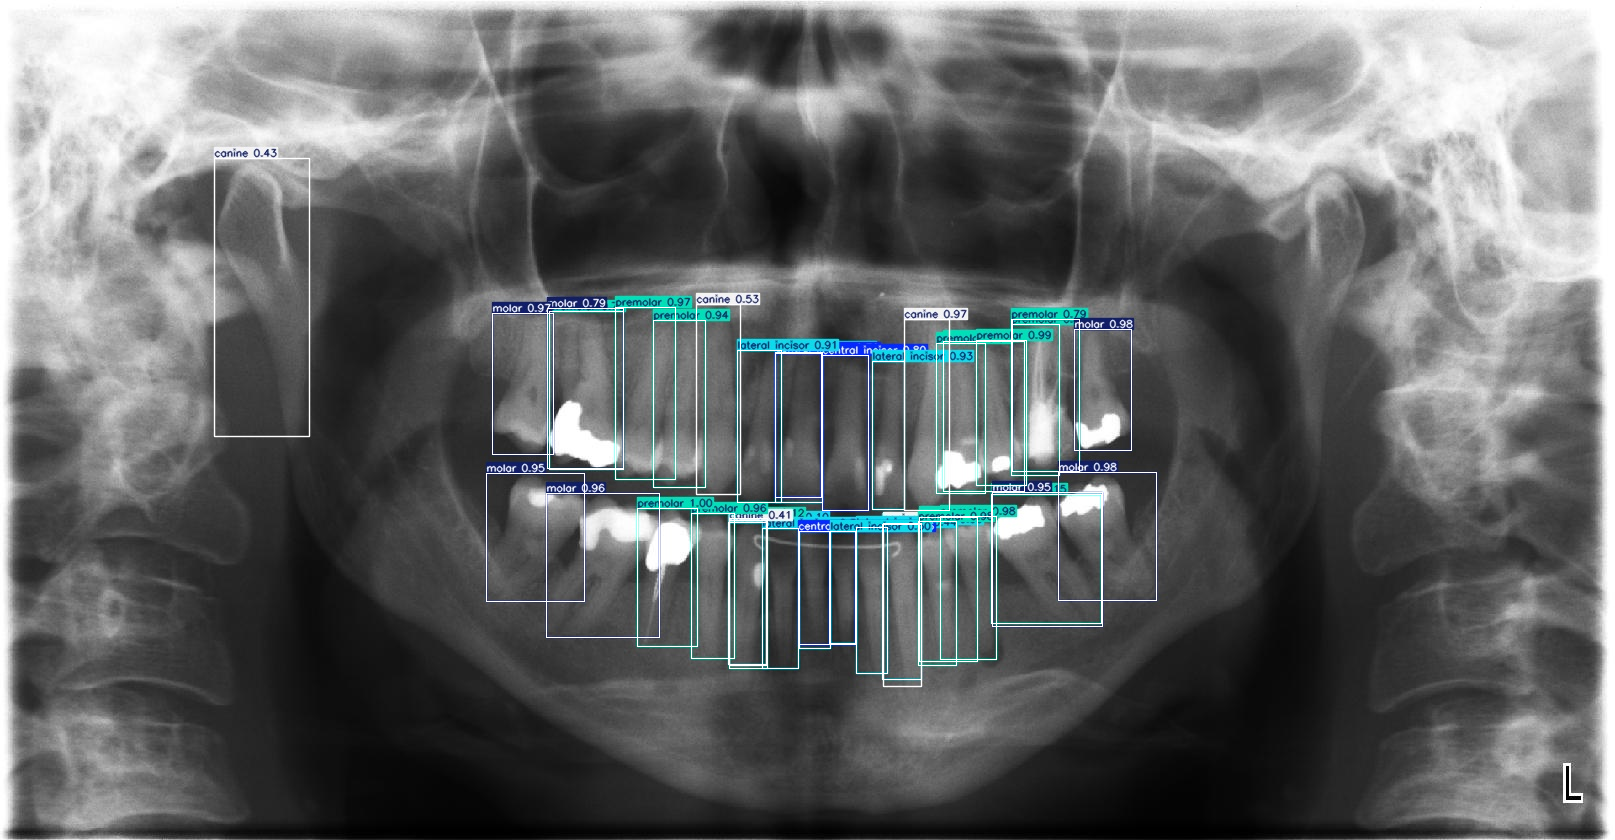

In [33]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/projectx/test_results_m2/1004.jpg')

# Iterate over the predictions
for result in results[0].boxes.data:
    x1, y1, x2, y2, score, class_id = result[:6].cpu().numpy()
    class_name = model.names[int(class_id)]
    confidence = f"{score:.2f}"

    # Draw thin bounding box
    color = (255, 255, 255)  # White color for box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 1)

    # Calculate label position (above the box)
    label_x, label_y = int(x1), int(y1) - 10
    if label_y < 10:
        label_y = int(y2) + 20  # If above is outside image, place below


from google.colab.patches import cv2_imshow

# Display the image in Colab
cv2_imshow(image)


In [35]:
image = Image.open('/content/runs/detect/val10/confusion_matrix.png')
plt.figure(figsize = (20,10))

plt.imshow(image)
plt.show()


In [39]:
model = YOLO('yolov5s.pt')
model.train(data=yaml_file_path, imgsz=640, batch=16, save=True, name='val_results_v5s')

PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5s.pt, data=/content/drive/MyDrive/projectx/yolov8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=val_results_v5s2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=Fals

train: Scanning /content/drive/MyDrive/projectx/train/labels.cache... 107 images, 2 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/projectx/val/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/detect/val_results_v5s2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/val_results_v5s2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.16G      2.432      4.725      1.758        459        640: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

                   all         23        567      0.249      0.035     0.0138    0.00687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.49G      1.628      2.622      1.227        600        640: 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]

                   all         23        567      0.331      0.568      0.352      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.39G      1.222      1.455       1.04        627        640: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.03s/it]

                   all         23        567      0.391      0.757       0.48      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.66G      1.189      1.272      1.007        577        640: 100%|██████████| 7/7 [00:03<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         23        567      0.532      0.736      0.613      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.23G      1.102      1.135      1.004        497        640: 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         23        567      0.627      0.767      0.742      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.59G      1.084      1.027     0.9763        544        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         23        567       0.64      0.826      0.757      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       4.4G      1.051     0.9324     0.9759        588        640: 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         23        567      0.809      0.794      0.847      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.62G      1.024     0.8616     0.9709        533        640: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         23        567       0.73      0.824      0.858      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.39G      1.014      0.809     0.9633        548        640: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.13it/s]

                   all         23        567      0.819       0.85      0.903      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.63G     0.9995     0.7974     0.9606        566        640: 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         23        567      0.859      0.842      0.926       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.45G      1.008     0.7484     0.9582        520        640: 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         23        567      0.868      0.839      0.931      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       4.3G     0.9952     0.7246     0.9527        451        640: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         23        567      0.917      0.866      0.953      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.23G     0.9831     0.7269     0.9519        367        640: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23        567      0.832      0.846      0.923      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.51G     0.9642     0.7199     0.9558        590        640: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]

                   all         23        567       0.94       0.93       0.97      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.63G     0.9448     0.6851     0.9336        547        640: 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.87it/s]

                   all         23        567      0.927       0.91      0.969      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       4.5G     0.9783     0.6827     0.9413        441        640: 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.62it/s]

                   all         23        567      0.928      0.917      0.965      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       4.2G     0.9096     0.6594     0.9301        529        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.94it/s]

                   all         23        567      0.918      0.935      0.976      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.33G     0.9396     0.6534     0.9313        472        640: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.44s/it]

                   all         23        567      0.945      0.924      0.982      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.27G     0.9541     0.6472     0.9405        457        640: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         23        567      0.941      0.933      0.979      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.63G     0.9017     0.6215     0.9256        575        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         23        567      0.957      0.915      0.982      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.56G     0.8841     0.5966     0.9311        606        640: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         23        567      0.961       0.92      0.982      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.47G     0.9083     0.5944     0.9292        419        640: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         23        567       0.95      0.941      0.985      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.38G     0.9169     0.6025     0.9187        476        640: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         23        567      0.931      0.915      0.978      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.63G     0.8591     0.5684     0.9183        481        640: 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         23        567      0.958      0.952      0.984      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.34G     0.8701     0.5677      0.914        630        640: 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23        567      0.954       0.96      0.985      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.24G     0.9233     0.5747     0.9203        664        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         23        567      0.954      0.958      0.987      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.62G     0.8924     0.5612     0.9186        630        640: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         23        567      0.955      0.936      0.983      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.22G     0.8741     0.5462     0.9161        467        640: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]

                   all         23        567      0.951      0.939      0.983      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.46G     0.8668     0.5464     0.9185        510        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all         23        567      0.965      0.948      0.985      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.47G     0.8678     0.5364     0.9191        547        640: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         23        567      0.958      0.955      0.983      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.63G     0.8926     0.5548     0.9126        673        640: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         23        567      0.971      0.965       0.99      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.52G     0.8739     0.5444     0.9124        643        640: 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all         23        567      0.971      0.973      0.991      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.26G     0.8648     0.5353     0.9007        780        640: 100%|██████████| 7/7 [00:03<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         23        567      0.962      0.982      0.991      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.47G     0.8552     0.5258      0.906        471        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]

                   all         23        567       0.97      0.972       0.99      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.45G     0.8343     0.5164      0.898        755        640: 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         23        567      0.965      0.966      0.989       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.53G     0.8143      0.514     0.8994        526        640: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         23        567      0.972      0.957      0.988      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.17G     0.8202     0.5103     0.9013        606        640: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]

                   all         23        567      0.968      0.945      0.983      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.68G     0.8064     0.5022     0.8939        579        640: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         23        567      0.972      0.973      0.991      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.85G     0.8257     0.4994     0.8912        570        640: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]

                   all         23        567       0.97      0.969       0.99      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.38G     0.8531      0.515     0.8946        542        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         23        567      0.979      0.949      0.987      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.23G     0.8166     0.5048     0.8931        438        640: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         23        567      0.956      0.975      0.988      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.21G     0.8291     0.4948     0.8836        744        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         23        567      0.975      0.966      0.991       0.74



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.46G       0.81     0.5024     0.8913        485        640: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.09it/s]

                   all         23        567      0.978      0.963      0.992      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.67G     0.7698     0.4734     0.8905        382        640: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         23        567      0.959      0.974       0.99      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.19G     0.7795     0.4702     0.8814        644        640: 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]

                   all         23        567      0.969      0.966       0.99      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.39G     0.7866     0.4752     0.8852        525        640: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         23        567      0.963      0.978      0.991      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.46G      0.788     0.4692     0.8825        500        640: 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         23        567      0.978      0.964      0.989      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.39G     0.7462     0.4601     0.8813        486        640: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         23        567      0.973      0.979       0.99      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.26G     0.7418      0.445     0.8777        560        640: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all         23        567      0.976      0.978       0.99       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.37G     0.7449     0.4514     0.8816        469        640: 100%|██████████| 7/7 [00:04<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all         23        567      0.976      0.973      0.991      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.38G     0.7343     0.4574      0.883        271        640: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]

                   all         23        567      0.968      0.966      0.988       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.45G      0.771     0.4643     0.8756        519        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]

                   all         23        567      0.973      0.967      0.988      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.44G     0.7634     0.4688     0.8909        565        640: 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         23        567      0.972      0.974      0.989      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.25G     0.7527     0.4603     0.8844        518        640: 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]

                   all         23        567      0.968      0.978      0.988      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.85G     0.7695     0.4528      0.879        639        640: 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.51it/s]

                   all         23        567      0.972      0.972      0.989      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.24G     0.7421     0.4506     0.8798        551        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         23        567      0.975      0.975       0.99      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.37G     0.7621      0.452     0.8835        496        640: 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]

                   all         23        567      0.975      0.977       0.99      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.22G     0.7694     0.4581     0.8834        543        640: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23        567      0.978      0.979      0.991      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.61G     0.7548     0.4492     0.8893        346        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         23        567      0.971      0.979      0.991      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.47G      0.748     0.4569     0.8851        766        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         23        567      0.972      0.972      0.991      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.24G     0.7603     0.4496     0.8715        510        640: 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         23        567      0.976      0.967       0.99      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.23G     0.7154     0.4346     0.8772        321        640: 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         23        567       0.98      0.976       0.99      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.63G     0.7028      0.429     0.8673        494        640: 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         23        567      0.968      0.977       0.99      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.74G     0.7523     0.4438     0.8692        539        640: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         23        567      0.971      0.965      0.988      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.36G     0.7365      0.446     0.8722        636        640: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         23        567      0.971      0.966      0.988      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.29G     0.7304     0.4352     0.8683        377        640: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]

                   all         23        567      0.976      0.966      0.988      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.49G     0.7369     0.4326     0.8703        561        640: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         23        567      0.968      0.976      0.988      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.34G     0.7226     0.4268      0.867        540        640: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         23        567      0.973      0.966      0.988      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.69G     0.6939     0.4208     0.8665        514        640: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         23        567      0.971      0.965      0.988      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       4.5G     0.7266     0.4295     0.8673        498        640: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         23        567      0.971      0.963      0.988      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.46G      0.707     0.4236     0.8656        529        640: 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]

                   all         23        567      0.969      0.973      0.989      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.26G      0.693     0.4138     0.8633        536        640: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23        567      0.975      0.986       0.99      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.37G     0.7023     0.4207     0.8624        598        640: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         23        567       0.98      0.987       0.99      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       4.4G     0.7058     0.4199     0.8634        471        640: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         23        567      0.962      0.991      0.989      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.83G     0.7084     0.4232     0.8683        721        640: 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all         23        567      0.955      0.986      0.988      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.56G     0.7119     0.4197     0.8669        658        640: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         23        567       0.96      0.981      0.987      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.33G     0.6919     0.4157     0.8639        331        640: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]

                   all         23        567       0.96      0.982      0.987      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       4.7G     0.7036     0.4141     0.8614        641        640: 100%|██████████| 7/7 [00:03<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         23        567      0.978       0.97      0.989      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       4.4G       0.68     0.4028     0.8632        545        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         23        567      0.971      0.974      0.989      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.89G     0.7077     0.4128     0.8567        578        640: 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         23        567       0.97       0.97      0.988      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.32G     0.6974     0.4119     0.8584        507        640: 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         23        567      0.968       0.97      0.988      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.48G     0.6994     0.4149     0.8632        462        640: 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         23        567      0.977      0.971      0.988      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.22G     0.6733     0.4047     0.8562        560        640: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         23        567      0.978      0.972      0.989      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.58G     0.6984     0.4125     0.8583        583        640: 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         23        567      0.976      0.977      0.989      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.25G     0.6724     0.4015     0.8517        614        640: 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all         23        567      0.973       0.98       0.99      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.69G     0.6955     0.4093      0.859        593        640: 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         23        567      0.969      0.986       0.99      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.42G     0.6696     0.3992     0.8576        401        640: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         23        567       0.97      0.984       0.99      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.25G      0.683     0.4054     0.8541        510        640: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         23        567      0.965      0.982       0.99      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.41G     0.6631     0.3978     0.8531        515        640: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         23        567      0.964      0.982      0.989      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.21G      0.669     0.4007     0.8522        551        640: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.06it/s]

                   all         23        567      0.967      0.976      0.989      0.775


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.24G     0.6718     0.4129     0.8609        267        640: 100%|██████████| 7/7 [00:07<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         23        567      0.966      0.975      0.989      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.26G     0.6542     0.3958     0.8509        274        640: 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         23        567      0.967      0.972      0.989       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.23G     0.6284     0.3742     0.8522        308        640: 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         23        567      0.966      0.972       0.99      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.25G      0.634     0.3813     0.8532        296        640: 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         23        567      0.969      0.972       0.99      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.24G     0.6387      0.382     0.8546        297        640: 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

                   all         23        567      0.965      0.979       0.99      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.26G     0.6238      0.371     0.8412        299        640: 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         23        567      0.968      0.981       0.99      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.23G     0.6464     0.3832     0.8474        281        640: 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         23        567      0.969      0.981       0.99      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.25G     0.6151     0.3683      0.844        300        640: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         23        567      0.964      0.981       0.99      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.24G     0.6205     0.3732     0.8442        276        640: 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         23        567      0.962      0.981      0.989      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.26G     0.6213     0.3718     0.8474        256        640: 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         23        567      0.964      0.981       0.99      0.775



100 epochs completed in 0.223 hours.
Optimizer stripped from runs/detect/val_results_v5s2/weights/last.pt, 18.5MB
Optimizer stripped from runs/detect/val_results_v5s2/weights/best.pt, 18.5MB

Validating runs/detect/val_results_v5s2/weights/best.pt...
Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv5s summary (fused): 193 layers, 9,113,471 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


                   all         23        567      0.968      0.981       0.99       0.78
       central incisor         23         83      0.976      0.979      0.991      0.753
       lateral incisor         23         86      0.963      0.965      0.988      0.749
                canine         23         83      0.941          1      0.987      0.762
              premolar         21        150      0.965       0.98       0.99      0.789
                 molar         21        165      0.997      0.982      0.995      0.845
Speed: 0.2ms preprocess, 3.4ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/val_results_v5s2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797c25ccb7d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [40]:


model = YOLO ('/content/runs/detect/val_results_v5s2/weights/best.pt')

results = model.predict(test_images_dir, save=True, project="/content/drive/MyDrive/projectx", name="test_results_v5s2", show=False, line_width=1, conf=0.1)
metrics_m = model.val(data = yaml_file_path, split = 'test')
print(metrics_m)


image 1/24 /content/drive/MyDrive/projectx/test/images/1004.JPG: 352x640 5 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 8 molars, 33.5ms
image 2/24 /content/drive/MyDrive/projectx/test/images/1016.JPG: 352x640 4 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 11 molars, 11.2ms
image 3/24 /content/drive/MyDrive/projectx/test/images/179.JPG: 352x640 4 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 12 molars, 10.5ms
image 4/24 /content/drive/MyDrive/projectx/test/images/192.jpg: 384x640 4 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 12 molars, 32.9ms
image 5/24 /content/drive/MyDrive/projectx/test/images/197.jpg: 384x640 4 central incisors, 4 lateral incisors, 4 canines, 8 premolars, 12 molars, 13.5ms
image 6/24 /content/drive/MyDrive/projectx/test/images/276.JPG: 352x640 4 central incisors, 4 lateral incisors, 4 canines, 7 premolars, 10 molars, 10.7ms
image 7/24 /content/drive/MyDrive/projectx/test/images/333.JPG: 352x640 4 

val: Scanning /content/drive/MyDrive/projectx/test/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100%|██████████| 24/24 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]


                   all         24        679       0.99      0.991      0.994      0.804
       central incisor         23         90          1      0.992      0.995      0.778
       lateral incisor         23         89      0.981      0.989      0.994      0.772
                canine         24         92      0.976      0.989      0.994      0.808
              premolar         24        181      0.992      0.989      0.991      0.805
                 molar         23        227          1      0.996      0.995      0.858
Speed: 5.7ms preprocess, 11.1ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/detect/val11
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797bf0307f90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_resul

In [41]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/projectx/test_results_v5s2/1004.jpg')

# Iterate over the predictions
for result in results[0].boxes.data:
    x1, y1, x2, y2, score, class_id = result[:6].cpu().numpy()
    class_name = model.names[int(class_id)]
    confidence = f"{score:.2f}"

    # Draw thin bounding box
    color = (255, 255, 255)  # White color for box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 1)

    # Calculate label position (above the box)
    label_x, label_y = int(x1), int(y1) - 10
    if label_y < 10:
        label_y = int(y2) + 20  # If above is outside image, place below


from google.colab.patches import cv2_imshow

# Display the image in Colab
cv2_imshow(image)


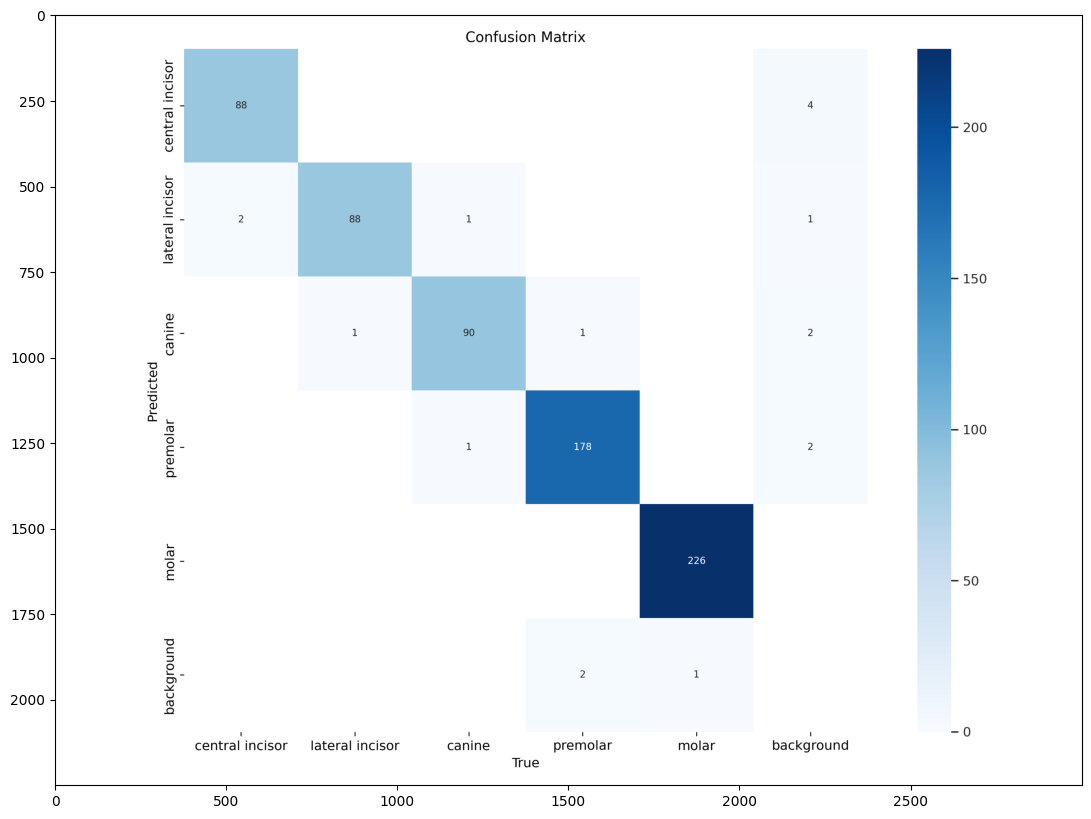

In [42]:
image = Image.open('/content/runs/detect/val11/confusion_matrix.png')
plt.figure(figsize = (20,10))

plt.imshow(image)
plt.show()


In [ ]:
model = YOLO('yolov5l.pt')
model.train(data=yaml_file_path, imgsz=640, batch=16, save=True, name='val_results_v5l')

PRO TIP 💡 Replace 'model=yolov5l.pt' with new 'model=yolov5lu.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 102M/102M [00:00<00:00, 127MB/s] 


Ultralytics 8.3.75 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov5l.pt, data=/content/drive/MyDrive/projectx/yolov8.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=val_results_v5l, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

train: Scanning /content/drive/MyDrive/projectx/train/labels.cache... 107 images, 2 backgrounds, 0 corrupt: 100%|██████████| 107/107 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/projectx/val/labels.cache... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<?, ?it/s]


Plotting labels to runs/detect/val_results_v5l/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/val_results_v5l
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.9G      2.026      4.281       1.65        459        640: 100%|██████████| 7/7 [00:08<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

                   all         23        567    0.00366     0.0568    0.00316    0.00172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.4G      1.321      2.307      1.143        600        640: 100%|██████████| 7/7 [00:07<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         23        567      0.308      0.765      0.368      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.9G     0.9993      1.194     0.9962        627        640: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.45it/s]

                   all         23        567       0.56      0.787      0.687        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.7G     0.9856      1.019     0.9647        577        640: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         23        567      0.268      0.832      0.374       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100        11G     0.9786     0.8971      1.003        497        640: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.49it/s]

                   all         23        567      0.293      0.825      0.313      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      11.2G     0.9669     0.8187     0.9945        544        640: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         23        567      0.416      0.809      0.428      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100        11G      0.911     0.7699     0.9693        588        640: 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

                   all         23        567      0.742      0.864      0.797      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.8G      0.887     0.7009     0.9618        533        640: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.53it/s]

                   all         23        567       0.76      0.843      0.848        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.1G      0.887     0.6615      0.969        548        640: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         23        567      0.827      0.893      0.914      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      11.1G     0.9097     0.6503     0.9827        566        640: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         23        567      0.947      0.919      0.978      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100        11G     0.9197     0.6211     0.9628        520        640: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]

                   all         23        567      0.936      0.931      0.975      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100        11G     0.8635     0.5918     0.9549        451        640: 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.58it/s]

                   all         23        567      0.902      0.847      0.938      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.8G     0.8604     0.5872     0.9593        367        640: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.59it/s]

                   all         23        567      0.919      0.913      0.967      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        11G     0.9039     0.6034     0.9899        590        640: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.66it/s]

                   all         23        567      0.946      0.936      0.981      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.1G     0.8557     0.5701     0.9472        547        640: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         23        567      0.948      0.951      0.982      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        11G     0.8484       0.58     0.9397        441        640: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         23        567      0.931      0.945       0.98      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.8G     0.8282     0.5824     0.9433        529        640: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         23        567      0.939      0.975      0.983      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100        11G     0.8258     0.5454     0.9337        472        640: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         23        567      0.971      0.962      0.988      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100        11G     0.8686     0.5486     0.9618        457        640: 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         23        567      0.944      0.961      0.988      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      11.2G     0.8233     0.5264     0.9367        575        640: 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.00s/it]

                   all         23        567      0.953       0.97      0.981      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.2G     0.8276     0.5176     0.9575        606        640: 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.44it/s]

                   all         23        567      0.963      0.973      0.983      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100        11G     0.8123     0.4996     0.9384        419        640: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         23        567      0.975      0.965      0.987      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.1G      0.866     0.5103     0.9428        476        640: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.64it/s]

                   all         23        567      0.959      0.931       0.98       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100        11G     0.8581     0.5036     0.9635        481        640: 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         23        567      0.973      0.962      0.988      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      11.2G     0.8282     0.4872     0.9485        630        640: 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         23        567      0.973      0.937      0.988      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100        11G     0.8711     0.4918     0.9585        664        640: 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         23        567      0.971      0.964      0.986      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.1G     0.8236     0.4762     0.9399        630        640: 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         23        567      0.986      0.968      0.992      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        11G     0.8253     0.4689     0.9437        467        640: 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         23        567      0.983      0.965      0.991      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      11.2G     0.7746     0.4612     0.9276        510        640: 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]

                   all         23        567      0.974      0.981      0.991       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100        11G     0.7712     0.4426     0.9208        547        640: 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

                   all         23        567      0.973      0.968       0.99       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.1G     0.7515     0.4423     0.9044        889        640:  43%|████▎     | 3/7 [00:02<00:03,  1.22it/s]

In [ ]:


model = YOLO ('/content/runs/detect/val_results_v5l/weights/best.pt')

results = model.predict(test_images_dir, save=True, project="/content/drive/MyDrive/projectx", name="test_results_v5l", show=False, line_width=1, conf=0.1)
metrics_m = model.val(data = yaml_file_path, split = 'test')
print(metrics_m)

In [ ]:
# Load the image
image = cv2.imread('/content/drive/MyDrive/projectx/test_results_v5l/1004.jpg')

# Iterate over the predictions
for result in results[0].boxes.data:
    x1, y1, x2, y2, score, class_id = result[:6].cpu().numpy()
    class_name = model.names[int(class_id)]
    confidence = f"{score:.2f}"

    # Draw thin bounding box
    color = (255, 255, 255)  # White color for box
    cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), color, 1)

    # Calculate label position (above the box)
    label_x, label_y = int(x1), int(y1) - 10
    if label_y < 10:
        label_y = int(y2) + 20  # If above is outside image, place below


from google.colab.patches import cv2_imshow

# Display the image in Colab
cv2_imshow(image)


In [ ]:
image = Image.open('/content/runs/detect/val12/confusion_matrix.png')
plt.figure(figsize = (20,10))

plt.imshow(image)
plt.show()
